In [49]:
import micropip
await micropip.install('pandas')

In [50]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [51]:
F_h = pd.read_csv('files/facebook_ads_data (2.0).csv')

In [52]:
def check_nulls_and_descrb(Df, name="Dataset"):
    print(f"\n{name} Info:")
    print("-" * 50)
    nulls = Df.isnull().sum()
    dtypes = Df.dtypes
    summary = pd.DataFrame({
        "Data Type": dtypes,
        "Missing Values": nulls,
        "Missing (%)": (nulls / len(Df)) * 100 })
    print(summary)
    print(f"\n{name} Description:")
    print("-" * 50)
    print(Df.describe().T)
    print(f"\n{name} Sample:")
    print("-" * 50)
    print(Df.sample(5))

check_nulls_and_descrb(F_h, "File")


File Info:
--------------------------------------------------
                  Data Type  Missing Values  Missing (%)
ad_date              object               0     0.000000
campaign_name        object               0     0.000000
total_spend         float64               0     0.000000
total_impressions     int64               0     0.000000
total_clicks          int64               0     0.000000
total_value         float64               0     0.000000
cpc                 float64              51     3.413655
cpm                 float64              32     2.141901
ctr                 float64              32     2.141901
romi                float64              32     2.141901

File Description:
--------------------------------------------------
                    count          mean           std       min          25%  \
total_spend        1494.0    131.035964    214.968986  0.000000    18.047500   
total_impressions  1494.0  34190.182062  44433.507387  0.000000  8377.000000   


In [53]:
print('Repeating lines =', F_h.duplicated().sum(), '\n')

Repeating lines = 0 



In [54]:
F_h.fillna({'cpc':0, 'cpm':0, 'ctr':0, 'romi':0}, inplace=True)
print('Current status of data with null values =\n', F_h.isnull().sum(), '\n')

Current status of data with null values =
 ad_date              0
campaign_name        0
total_spend          0
total_impressions    0
total_clicks         0
total_value          0
cpc                  0
cpm                  0
ctr                  0
romi                 0
dtype: int64 



In [55]:
F_h['ad_date']=pd.to_datetime(F_h['ad_date'])

In [56]:
await micropip.install('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
import warnings
warnings.filterwarnings("ignore")

       ad_date  total_spend      romi
0   2021-01-01         0.39  1.512821
1   2021-01-02         7.74  0.891473
2   2021-01-04        70.06  0.977305
3   2021-01-05        81.15  0.760074
4   2021-01-06       142.77  2.022425
..         ...          ...       ...
324 2021-12-27       478.31  4.236782
325 2021-12-28       359.83  4.178221
326 2021-12-29       163.25  3.790408
327 2021-12-30       285.67  3.962574
328 2021-12-31       173.38  4.127073

[329 rows x 3 columns]


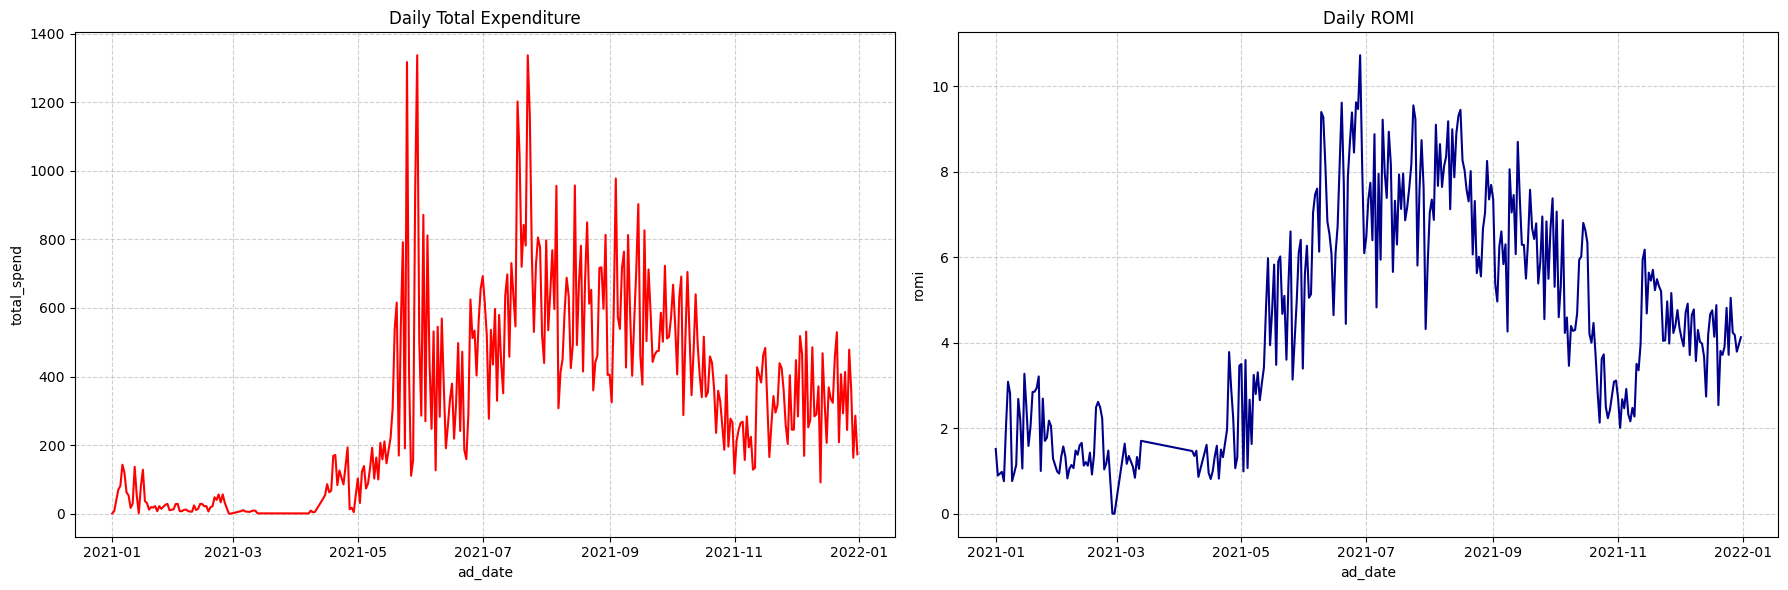

In [58]:
F_h2021 = F_h[F_h['ad_date'].dt.year == 2021 ]
Day_grp = F_h2021.groupby('ad_date', as_index=False).agg({'total_spend':sum, 'romi':sum})
print(Day_grp)
fig, ax =plt.subplots(ncols=2, figsize=(18,6))
#ax[0].plot(Day_grp['ad_date'], Day_grp['total_spend'])
#ax[1].plot(Day_grp['ad_date'], Day_grp['romi'])
sns.lineplot(Day_grp, x='ad_date', y='total_spend', color='red', ax=ax[0])
ax[0].grid(True, linestyle='--', alpha=0.6)
ax[0].set_title('Daily Total Expenditure')
sns.lineplot(Day_grp, x='ad_date', y='romi', color='darkblue', ax=ax[1])
ax[1].grid(True, linestyle='--', alpha=0.6)
ax[1].set_title('Daily ROMI')
plt.tight_layout()
plt.show()

      campaign_name  total_spend        romi
0             Brand       539.92  124.129263
1   Crazy discounts      2175.29  149.897575
2         Discounts      2856.39  120.969760
3       Electronics     23920.42  208.296664
4         Expansion     67212.82  141.125258
5           Hobbies     11326.97  121.418808
6         Lookalike     63631.09  288.853058
7         New items      2936.97  124.076123
8            Promos      4993.84  248.774371
9            Trendy      1992.31  167.453207
10        Wholesale     14181.71  244.088157 



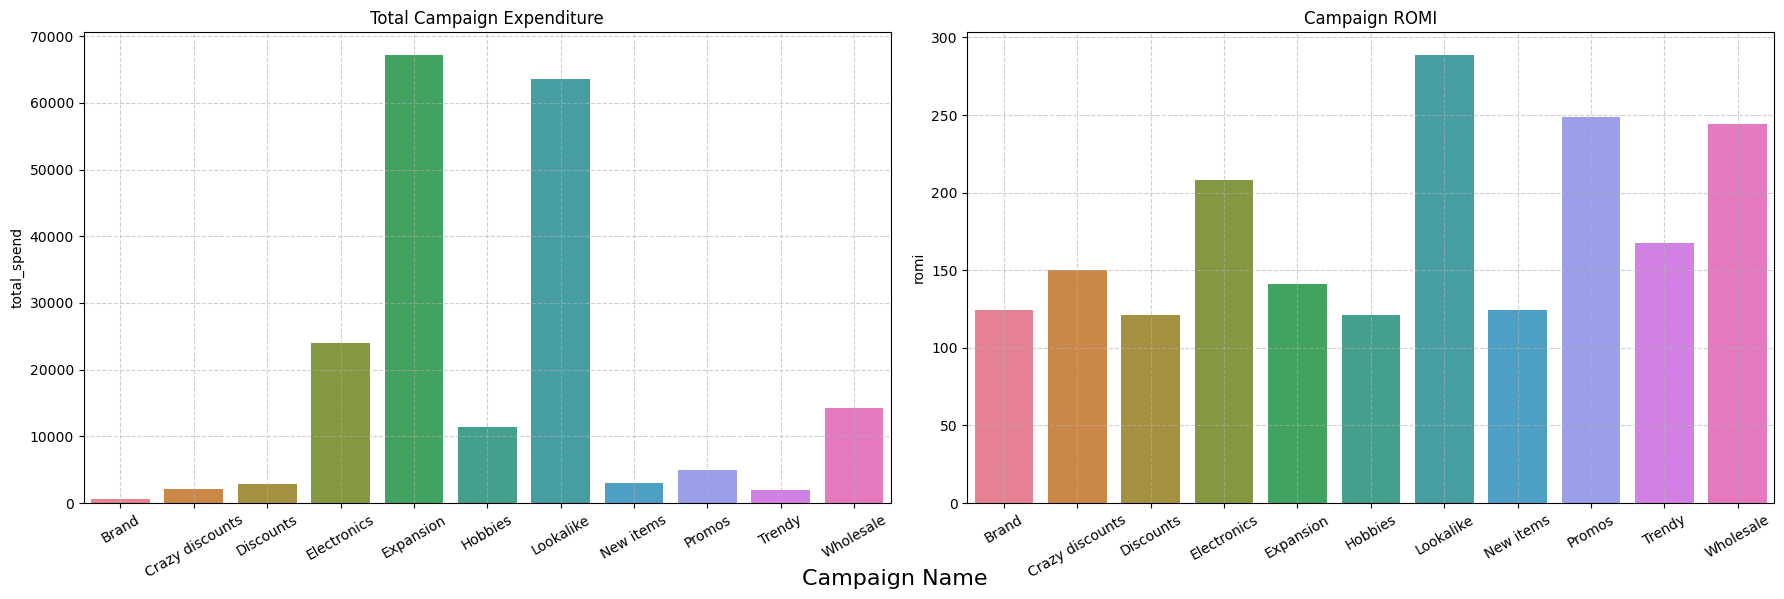

In [59]:
Camp_grp = F_h.groupby('campaign_name', as_index=False).agg({'total_spend':sum, 'romi':sum})
print(Camp_grp, '\n')
fig, ax =plt.subplots(ncols=2, figsize=(18,6))
sns.barplot(Camp_grp, x='campaign_name', y='total_spend', hue='campaign_name', ax=ax[0])
ax[0].grid(True, linestyle='--', alpha=0.6)
ax[0].set_title('Total Campaign Expenditure')
ax[0].tick_params(axis='x', rotation=30)
ax[0].set_xlabel('')
sns.barplot(Camp_grp, x='campaign_name', y='romi', hue='campaign_name', ax=ax[1])
ax[1].grid(True, linestyle='--', alpha=0.6)
ax[1].set_title('Campaign ROMI')
ax[1].tick_params(axis='x', rotation=30)
ax[1].set_xlabel('')
plt.tight_layout()
fig.text(
    x=0.5,           # Horizontally centered (between 0-1, 0.5 = center)
    y=0.01,          # Bottom in vertical (0 = lowest)
    s='Campaign Name',
    ha='center',     # Horizontal alignment: center
    va='bottom',     # Vertical alignment: stuck to the bottom
    fontsize=16
)
plt.show()

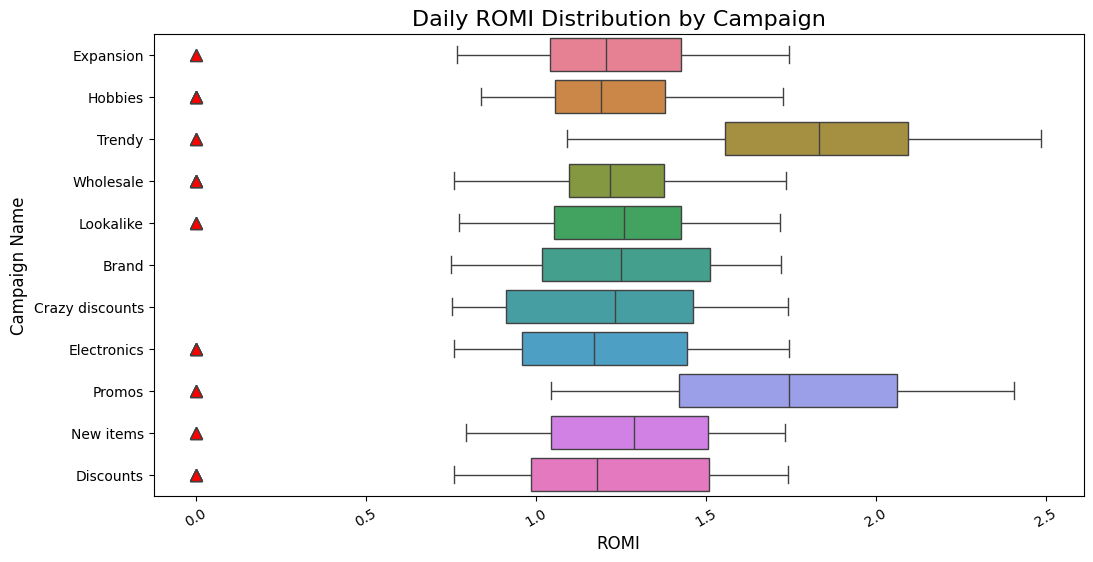

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(F_h, x='romi', y='campaign_name', hue='campaign_name', flierprops={"marker": "^", "markersize": 8, "markerfacecolor": 'red'})
plt.xticks(rotation = 30)
plt.title('Daily ROMI Distribution by Campaign', fontsize = 16)
plt.xlabel('ROMI', fontsize = 12)
plt.ylabel('Campaign Name', fontsize = 12)
plt.show()

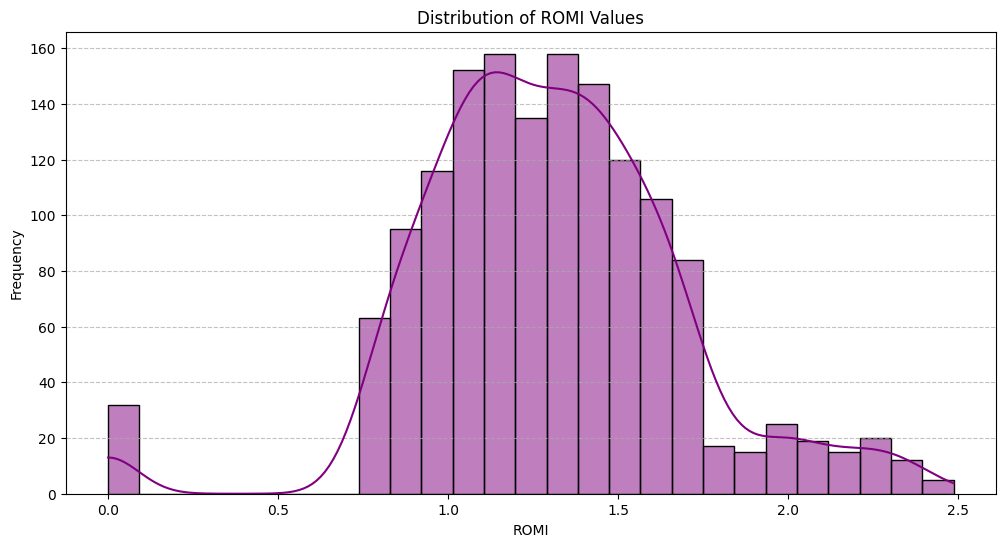

In [61]:
plt.figure(figsize=(12, 6))
sns.histplot(F_h, x="romi", kde=True, bins=27, color="purple")
plt.title("Distribution of ROMI Values")
plt.xlabel("ROMI")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", color='darkgray', alpha=0.7)
plt.show()

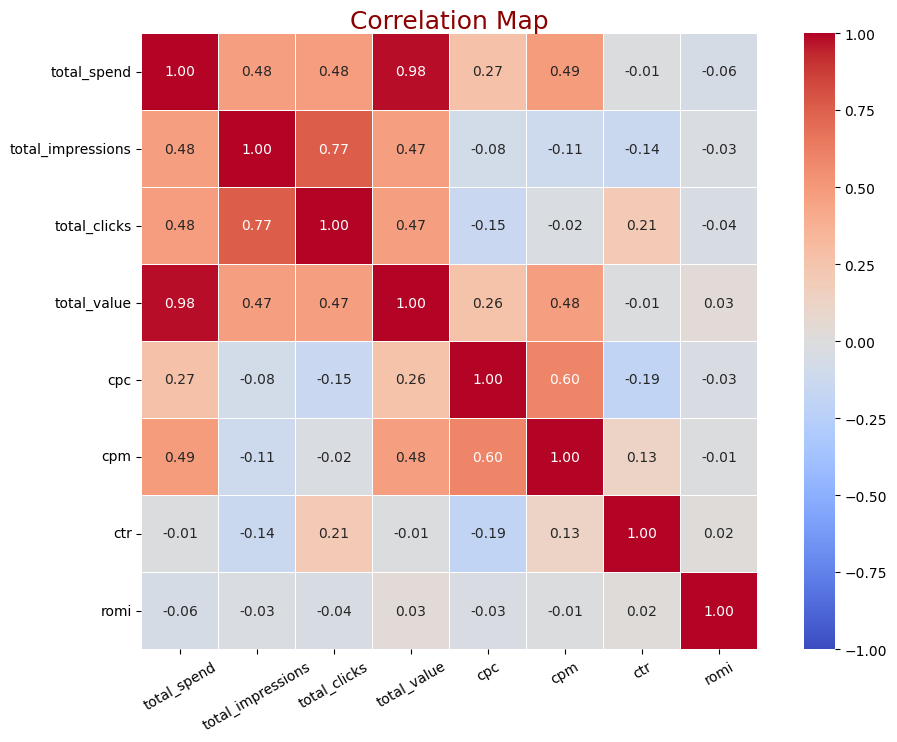


Highest Correlations:
total_spend - total_value: 0.98
total_clicks - total_impressions: 0.77
cpc - cpm: 0.60

Lowest Correlations:
cpc - ctr: -0.19
cpc - total_clicks: -0.15
ctr - total_impressions: -0.14

Correlation ratio of total_value with other data = 
 total_value          1.000000
total_spend          0.978890
cpm                  0.475645
total_clicks         0.472124
total_impressions    0.472037
cpc                  0.258207
romi                 0.032000
ctr                 -0.010272
Name: total_value, dtype: float64

Data with the most significant correlation with total_value: is total_spend.


In [62]:
plt.figure(figsize=(12,8))
sns.heatmap(F_h.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1,vmax=1, linewidths=0.5, linecolor="white", square=True)
plt.xticks(rotation=30)
plt.title('Correlation Map', fontsize=18, color='darkred', va='top')
plt.show()
Cor_gra = F_h.corr(numeric_only=True)
correlation_dict = {}
for col1 in Cor_gra.columns:
    #print('col1 =', col1)
    for col2 in Cor_gra.columns:
        #print('col2 =', col2)
        if col1 < col2:  # To avoid duplicate pairs
            #print('COL1 =', col1, 'COL2 =', col2)
            key = f"{col1} - {col2}"
            #print(key)
            correlation_dict[key] = Cor_gra.loc[col1, col2]
            #print(correlation_dict)
#for key, value in correlation_dict.items():
    #print(f"{key}: {value:.2f}")
sorted_yüksek = sorted(correlation_dict.items(), key=lambda x: x[1], reverse=True)[:3]
print("\nHighest Correlations:")
for key, value in sorted_yüksek:
    print(f"{key}: {value:.2f}")
sorted_düşük = sorted(correlation_dict.items(), key=lambda x: x[1])[:3]
print("\nLowest Correlations:")
for key, value in sorted_düşük:
    print(f"{key}: {value:.2f}")
print('\nCorrelation ratio of total_value with other data = \n', F_h.corr(numeric_only=True)['total_value'].sort_values(ascending=False))
print("\nData with the most significant correlation with total_value: is total_spend.")

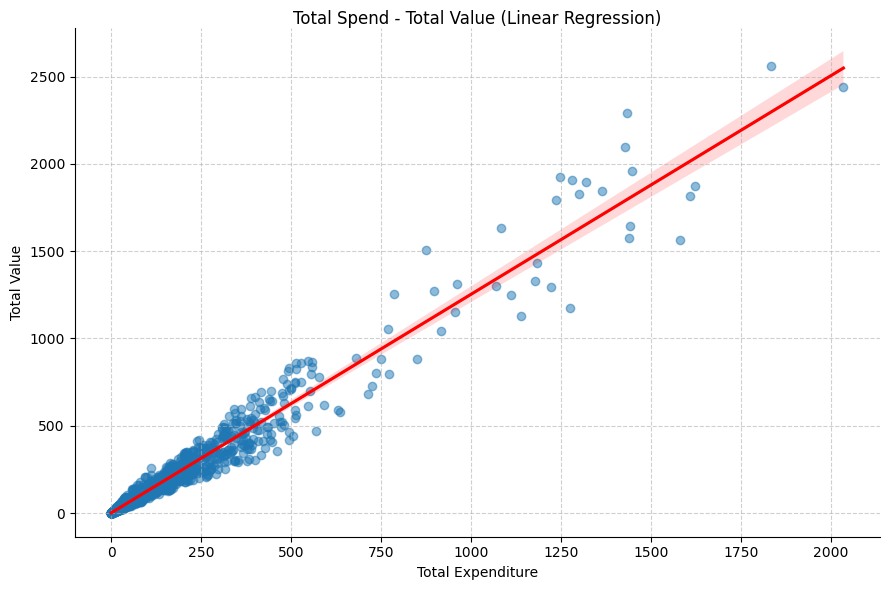

In [63]:
sns.lmplot(data=F_h, x='total_spend', y='total_value', scatter_kws={'alpha': 0.5}, height=6, aspect=1.5, line_kws={'color': 'red'})
plt.xlabel('Total Expenditure')
plt.ylabel('Total Value')
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Total Spend - Total Value (Linear Regression)', pad=0)
fig.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()